In [2]:
import pandas as pd
import plotly.express as px

In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [7]:
OCT = pd.read_csv('AtrialProportionsOCT.csv')
OCT['modality']="OCT"
FFPE = pd.read_csv('AtrialProportionsFFPE.csv')
FFPE['modality']="FFPE"
df=pd.concat([OCT,FFPE])
df

,spot_id,AtrialCardiomyocytesLeft_immature,AtrialCardiomyocytesLeft,AtrialCardiomyocytesRight,AtrialCardiomyocytesRight_immature,sample,age,modality
0,HCAHeartST11605167_AAACATTTCCCGGATT-1,1.877678,0.345141,0.201719,0.535715,HCAHeartST11605167,GA-7w4d,OCT
1,HCAHeartST11605167_AAGCGCAGGGCTTTGA-1,1.138855,2.983185,0.096187,0.440762,HCAHeartST11605167,GA-7w4d,OCT
2,HCAHeartST11605167_AATTCGATTCGAGGAT-1,2.191962,6.975332,0.044196,0.464511,HCAHeartST11605167,GA-7w4d,OCT
3,HCAHeartST11605167_ACAAAGCATGACCTAG-1,1.428606,0.542499,0.551390,1.014553,HCAHeartST11605167,GA-7w4d,OCT
4,HCAHeartST11605167_ACCAACCGCACTCCAC-1,1.174236,0.891836,0.558041,1.258697,HCAHeartST11605167,GA-7w4d,OCT
...,...,...,...,...,...,...,...,...
2040,BHF_F_Hea13295831_TGTCGCGGCTACGCAC-1,0.159699,3.654230,21.926449,0.023600,BHF_F_Hea13295831,PCW-16w,FFPE
2041,BHF_F_Hea13295831_TGTCTGCCTCGTTAAG-1,0.076827,1.433332,24.742792,0.012840,BHF_F_Hea13295831,PCW-16w,FFPE
2042,BHF_F_Hea13295831_TGTTACAACGCTAATT-1,0.424777,15.822614,2.518111,0.019447,BHF_F_Hea13295831,PCW-16w,FFPE
2043,BHF_F_Hea13295831_TGTTGCCGGAATGATC-1,0.502313,3.217163,18.568831,0.019740,BHF_F_Hea13295831,PCW-16w,FFPE


In [8]:
def age_to_days(age_str):
    # Split the string into parts
    age_type, age_time = age_str.split('-')

    # Initialize weeks and days
    weeks = 0
    days = 0

    # Extract weeks and days from the age_time string
    if 'w' in age_time:
        week_day_parts = age_time.split('w')
        weeks = int(week_day_parts[0])  # Convert weeks to integer
        if len(week_day_parts) > 1 and 'd' in week_day_parts[1]:
            days = int(week_day_parts[1].replace('d', ''))  # Convert days to integer

    # Convert gestational age (GA) to post conception weeks (PCW)
    if age_type == 'GA':
        weeks -= 2

    # Convert weeks and days to total days
    total_days = weeks * 7 + days
    return total_days

# Apply the conversion to the DataFrame
df['days_post_conception'] = df['age'].apply(age_to_days)
df

,spot_id,AtrialCardiomyocytesLeft_immature,AtrialCardiomyocytesLeft,AtrialCardiomyocytesRight,AtrialCardiomyocytesRight_immature,sample,age,modality,days_post_conception
0,HCAHeartST11605167_AAACATTTCCCGGATT-1,1.877678,0.345141,0.201719,0.535715,HCAHeartST11605167,GA-7w4d,OCT,39
1,HCAHeartST11605167_AAGCGCAGGGCTTTGA-1,1.138855,2.983185,0.096187,0.440762,HCAHeartST11605167,GA-7w4d,OCT,39
2,HCAHeartST11605167_AATTCGATTCGAGGAT-1,2.191962,6.975332,0.044196,0.464511,HCAHeartST11605167,GA-7w4d,OCT,39
3,HCAHeartST11605167_ACAAAGCATGACCTAG-1,1.428606,0.542499,0.551390,1.014553,HCAHeartST11605167,GA-7w4d,OCT,39
4,HCAHeartST11605167_ACCAACCGCACTCCAC-1,1.174236,0.891836,0.558041,1.258697,HCAHeartST11605167,GA-7w4d,OCT,39
...,...,...,...,...,...,...,...,...,...
2040,BHF_F_Hea13295831_TGTCGCGGCTACGCAC-1,0.159699,3.654230,21.926449,0.023600,BHF_F_Hea13295831,PCW-16w,FFPE,112
2041,BHF_F_Hea13295831_TGTCTGCCTCGTTAAG-1,0.076827,1.433332,24.742792,0.012840,BHF_F_Hea13295831,PCW-16w,FFPE,112
2042,BHF_F_Hea13295831_TGTTACAACGCTAATT-1,0.424777,15.822614,2.518111,0.019447,BHF_F_Hea13295831,PCW-16w,FFPE,112
2043,BHF_F_Hea13295831_TGTTGCCGGAATGATC-1,0.502313,3.217163,18.568831,0.019740,BHF_F_Hea13295831,PCW-16w,FFPE,112


In [9]:
df.days_post_conception = df.days_post_conception.astype('category')
df.days_post_conception = df.days_post_conception.astype(int)

In [10]:
# Adding a new column 'post_conception_weeks' based on the 'days post conception' column
def days_to_weeks_days(days):
    weeks = days // 7
    days_remaining = days % 7
    return f"{weeks}w{days_remaining}d"

df['post_conception_weeks'] = df['days_post_conception'].apply(days_to_weeks_days)

# Displaying the first few rows of the DataFrame to verify the new column
df.head()


,spot_id,AtrialCardiomyocytesLeft_immature,AtrialCardiomyocytesLeft,AtrialCardiomyocytesRight,AtrialCardiomyocytesRight_immature,sample,age,modality,days_post_conception,post_conception_weeks
0,HCAHeartST11605167_AAACATTTCCCGGATT-1,1.877678,0.345141,0.201719,0.535715,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d
1,HCAHeartST11605167_AAGCGCAGGGCTTTGA-1,1.138855,2.983185,0.096187,0.440762,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d
2,HCAHeartST11605167_AATTCGATTCGAGGAT-1,2.191962,6.975332,0.044196,0.464511,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d
3,HCAHeartST11605167_ACAAAGCATGACCTAG-1,1.428606,0.542499,0.551390,1.014553,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d
4,HCAHeartST11605167_ACCAACCGCACTCCAC-1,1.174236,0.891836,0.558041,1.258697,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d


In [11]:
# Verifying the changes by inspecting the value counts again
df['post_conception_weeks'].value_counts()

16w0d    2045
7w4d     1210
13w0d     682
5w4d      163
Name: post_conception_weeks, dtype: int64

In [21]:
# Correcting the order of the categories for the 'post_conception_weeks' column
correct_order_categories = ['16w0d', '13w0d','7w4d','5w4d']
correct_order_categories = ['5w4d', '7w4d','13w0d','16w0d']
df['post_conception_weeks'] = pd.Categorical(values=df['post_conception_weeks'], categories=correct_order_categories, ordered=True)

# Verifying the changes by inspecting the value counts again
df['post_conception_weeks'].dtypes

CategoricalDtype(categories=['5w4d', '7w4d', '13w0d', '16w0d'], ordered=True)

In [13]:
# Assuming 'data' is your pandas DataFrame
# Calculate the total for Left and Right cells separately
df['AtrialCardiomyocytesLeft_immature'] + df['AtrialCardiomyocytesLeft']


0        2.222819
1        4.122041
2        9.167294
3        1.971105
4        2.066072
          ...    
2040     3.813929
2041     1.510159
2042    16.247391
2043     3.719476
2044    21.171020
Length: 4100, dtype: float64

In [92]:
# Assuming 'data' is your pandas DataFrame
# Calculate the total for Left and Right cells separately
total_left = df['AtrialCardiomyocytesLeft_immature'] + df['AtrialCardiomyocytesLeft']
total_right = df['AtrialCardiomyocytesRight_immature'] + df['AtrialCardiomyocytesRight']

# Calculate the proportions for each cell type relative to their side
df['AtrialCardiomyocytesLeft_immature_prop'] = df['AtrialCardiomyocytesLeft_immature'] / total_left
df['AtrialCardiomyocytesLeft_prop'] = df['AtrialCardiomyocytesLeft'] / total_left

df['AtrialCardiomyocytesRight_immature_prop'] = df['AtrialCardiomyocytesRight_immature'] / total_right
df['AtrialCardiomyocytesRight_prop'] = df['AtrialCardiomyocytesRight'] / total_right

# Check the new columns in the DataFrame
df[['AtrialCardiomyocytesLeft_immature_prop', 'AtrialCardiomyocytesLeft_prop', 'AtrialCardiomyocytesRight_immature_prop', 'AtrialCardiomyocytesRight_prop']]
df

,spot_id,AtrialCardiomyocytesLeft_immature,AtrialCardiomyocytesLeft,AtrialCardiomyocytesRight,AtrialCardiomyocytesRight_immature,sample,age,modality,days_post_conception,post_conception_weeks,AtrialCardiomyocytesLeft_immature_prop,AtrialCardiomyocytesLeft_prop,AtrialCardiomyocytesRight_immature_prop,AtrialCardiomyocytesRight_prop,filter_out
0,HCAHeartST11605167_AAACATTTCCCGGATT-1,1.877678,0.345141,0.201719,0.535715,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.844728,0.155272,0.726459,0.273541,False
1,HCAHeartST11605167_AAGCGCAGGGCTTTGA-1,1.138855,2.983185,0.096187,0.440762,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.276284,0.723716,0.820865,0.179135,False
2,HCAHeartST11605167_AATTCGATTCGAGGAT-1,2.191962,6.975332,0.044196,0.464511,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.239107,0.760893,0.913121,0.086879,False
3,HCAHeartST11605167_ACAAAGCATGACCTAG-1,1.428606,0.542499,0.551390,1.014553,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.724774,0.275226,0.647886,0.352114,False
4,HCAHeartST11605167_ACCAACCGCACTCCAC-1,1.174236,0.891836,0.558041,1.258697,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.568342,0.431658,0.692834,0.307166,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,BHF_F_Hea13295831_TGTCGCGGCTACGCAC-1,0.159699,3.654230,21.926449,0.023600,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.041873,0.958127,0.001075,0.998925,False
2041,BHF_F_Hea13295831_TGTCTGCCTCGTTAAG-1,0.076827,1.433332,24.742792,0.012840,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.050873,0.949127,0.000519,0.999481,False
2042,BHF_F_Hea13295831_TGTTACAACGCTAATT-1,0.424777,15.822614,2.518111,0.019447,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.026144,0.973856,0.007664,0.992336,False
2043,BHF_F_Hea13295831_TGTTGCCGGAATGATC-1,0.502313,3.217163,18.568831,0.019740,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.135049,0.864951,0.001062,0.998938,False


<Axes: >

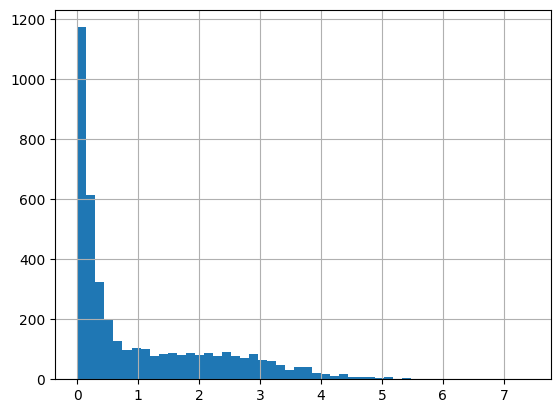

In [93]:
df.AtrialCardiomyocytesLeft_immature.hist(bins=50)

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df

,spot_id,AtrialCardiomyocytesLeft_immature,AtrialCardiomyocytesLeft,AtrialCardiomyocytesRight,AtrialCardiomyocytesRight_immature,sample,age,modality,days_post_conception,post_conception_weeks,AtrialCardiomyocytesLeft_immature_prop,AtrialCardiomyocytesLeft_prop,AtrialCardiomyocytesRight_immature_prop,AtrialCardiomyocytesRight_prop,filter_out
0,HCAHeartST11605167_AAACATTTCCCGGATT-1,1.877678,0.345141,0.201719,0.535715,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.844728,0.155272,0.726459,0.273541,False
1,HCAHeartST11605167_AAGCGCAGGGCTTTGA-1,1.138855,2.983185,0.096187,0.440762,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.276284,0.723716,0.820865,0.179135,False
2,HCAHeartST11605167_AATTCGATTCGAGGAT-1,2.191962,6.975332,0.044196,0.464511,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.239107,0.760893,0.913121,0.086879,False
3,HCAHeartST11605167_ACAAAGCATGACCTAG-1,1.428606,0.542499,0.551390,1.014553,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.724774,0.275226,0.647886,0.352114,False
4,HCAHeartST11605167_ACCAACCGCACTCCAC-1,1.174236,0.891836,0.558041,1.258697,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.568342,0.431658,0.692834,0.307166,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,BHF_F_Hea13295831_TGTCGCGGCTACGCAC-1,0.159699,3.654230,21.926449,0.023600,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.041873,0.958127,0.001075,0.998925,False
2041,BHF_F_Hea13295831_TGTCTGCCTCGTTAAG-1,0.076827,1.433332,24.742792,0.012840,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.050873,0.949127,0.000519,0.999481,False
2042,BHF_F_Hea13295831_TGTTACAACGCTAATT-1,0.424777,15.822614,2.518111,0.019447,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.026144,0.973856,0.007664,0.992336,False
2043,BHF_F_Hea13295831_TGTTGCCGGAATGATC-1,0.502313,3.217163,18.568831,0.019740,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.135049,0.864951,0.001062,0.998938,False


In [96]:
import pandas as pd

# Specify the columns to check for the condition
columns_to_check = [
    'AtrialCardiomyocytesLeft_immature',
    'AtrialCardiomyocytesLeft',
    'AtrialCardiomyocytesRight',
    'AtrialCardiomyocytesRight_immature'
]

# Add 'filter_out' column based on the condition
df['filter_out'] = df[columns_to_check].apply(lambda x: (x < 0.01).any(), axis=1)
df

,spot_id,AtrialCardiomyocytesLeft_immature,AtrialCardiomyocytesLeft,AtrialCardiomyocytesRight,AtrialCardiomyocytesRight_immature,sample,age,modality,days_post_conception,post_conception_weeks,AtrialCardiomyocytesLeft_immature_prop,AtrialCardiomyocytesLeft_prop,AtrialCardiomyocytesRight_immature_prop,AtrialCardiomyocytesRight_prop,filter_out
0,HCAHeartST11605167_AAACATTTCCCGGATT-1,1.877678,0.345141,0.201719,0.535715,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.844728,0.155272,0.726459,0.273541,False
1,HCAHeartST11605167_AAGCGCAGGGCTTTGA-1,1.138855,2.983185,0.096187,0.440762,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.276284,0.723716,0.820865,0.179135,False
2,HCAHeartST11605167_AATTCGATTCGAGGAT-1,2.191962,6.975332,0.044196,0.464511,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.239107,0.760893,0.913121,0.086879,False
3,HCAHeartST11605167_ACAAAGCATGACCTAG-1,1.428606,0.542499,0.551390,1.014553,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.724774,0.275226,0.647886,0.352114,False
4,HCAHeartST11605167_ACCAACCGCACTCCAC-1,1.174236,0.891836,0.558041,1.258697,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.568342,0.431658,0.692834,0.307166,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,BHF_F_Hea13295831_TGTCGCGGCTACGCAC-1,0.159699,3.654230,21.926449,0.023600,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.041873,0.958127,0.001075,0.998925,False
2041,BHF_F_Hea13295831_TGTCTGCCTCGTTAAG-1,0.076827,1.433332,24.742792,0.012840,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.050873,0.949127,0.000519,0.999481,False
2042,BHF_F_Hea13295831_TGTTACAACGCTAATT-1,0.424777,15.822614,2.518111,0.019447,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.026144,0.973856,0.007664,0.992336,False
2043,BHF_F_Hea13295831_TGTTGCCGGAATGATC-1,0.502313,3.217163,18.568831,0.019740,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.135049,0.864951,0.001062,0.998938,False


In [97]:
df[df['filter_out']==False]

,spot_id,AtrialCardiomyocytesLeft_immature,AtrialCardiomyocytesLeft,AtrialCardiomyocytesRight,AtrialCardiomyocytesRight_immature,sample,age,modality,days_post_conception,post_conception_weeks,AtrialCardiomyocytesLeft_immature_prop,AtrialCardiomyocytesLeft_prop,AtrialCardiomyocytesRight_immature_prop,AtrialCardiomyocytesRight_prop,filter_out
0,HCAHeartST11605167_AAACATTTCCCGGATT-1,1.877678,0.345141,0.201719,0.535715,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.844728,0.155272,0.726459,0.273541,False
1,HCAHeartST11605167_AAGCGCAGGGCTTTGA-1,1.138855,2.983185,0.096187,0.440762,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.276284,0.723716,0.820865,0.179135,False
2,HCAHeartST11605167_AATTCGATTCGAGGAT-1,2.191962,6.975332,0.044196,0.464511,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.239107,0.760893,0.913121,0.086879,False
3,HCAHeartST11605167_ACAAAGCATGACCTAG-1,1.428606,0.542499,0.551390,1.014553,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.724774,0.275226,0.647886,0.352114,False
4,HCAHeartST11605167_ACCAACCGCACTCCAC-1,1.174236,0.891836,0.558041,1.258697,HCAHeartST11605167,GA-7w4d,OCT,39,5w4d,0.568342,0.431658,0.692834,0.307166,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,BHF_F_Hea13295831_TGTCGCGGCTACGCAC-1,0.159699,3.654230,21.926449,0.023600,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.041873,0.958127,0.001075,0.998925,False
2041,BHF_F_Hea13295831_TGTCTGCCTCGTTAAG-1,0.076827,1.433332,24.742792,0.012840,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.050873,0.949127,0.000519,0.999481,False
2042,BHF_F_Hea13295831_TGTTACAACGCTAATT-1,0.424777,15.822614,2.518111,0.019447,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.026144,0.973856,0.007664,0.992336,False
2043,BHF_F_Hea13295831_TGTTGCCGGAATGATC-1,0.502313,3.217163,18.568831,0.019740,BHF_F_Hea13295831,PCW-16w,FFPE,112,16w0d,0.135049,0.864951,0.001062,0.998938,False


In [104]:
# Assuming 'data' is your DataFrame and it already includes an 'age' column
df_long = df.melt(id_vars='post_conception_weeks', var_name='cell_type', value_name='proportion', 
                    value_vars=['AtrialCardiomyocytesLeft_immature_prop', 'AtrialCardiomyocytesLeft_prop', 
                                'AtrialCardiomyocytesRight_prop', 'AtrialCardiomyocytesRight_immature_prop'])
df_long

,post_conception_weeks,cell_type,proportion
0,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.844728
1,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.276284
2,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.239107
3,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.724774
4,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.568342
...,...,...,...
16395,16w0d,AtrialCardiomyocytesRight_immature_prop,0.001075
16396,16w0d,AtrialCardiomyocytesRight_immature_prop,0.000519
16397,16w0d,AtrialCardiomyocytesRight_immature_prop,0.007664
16398,16w0d,AtrialCardiomyocytesRight_immature_prop,0.001062


In [105]:
#df_long.replace(to_replace='AtrialCardiomyocytesLeft_immature_prop', value='AtrialCardiomyocytesLeft_immature', inplace=True)
df_long.replace(to_replace='AtrialCardiomyocytesLeft_prop', value='AtrialCardiomyocytesLeft_mature_prop', inplace=True)
#df_long.replace(to_replace='AtrialCardiomyocytesRight_immature_prop', value='AtrialCardiomyocytesRight_immature', inplace=True)
df_long.replace(to_replace='AtrialCardiomyocytesRight_prop', value='AtrialCardiomyocytesRight_mature_prop', inplace=True)
df_long

,post_conception_weeks,cell_type,proportion
0,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.844728
1,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.276284
2,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.239107
3,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.724774
4,5w4d,AtrialCardiomyocytesLeft_immature_prop,0.568342
...,...,...,...
16395,16w0d,AtrialCardiomyocytesRight_immature_prop,0.001075
16396,16w0d,AtrialCardiomyocytesRight_immature_prop,0.000519
16397,16w0d,AtrialCardiomyocytesRight_immature_prop,0.007664
16398,16w0d,AtrialCardiomyocytesRight_immature_prop,0.001062


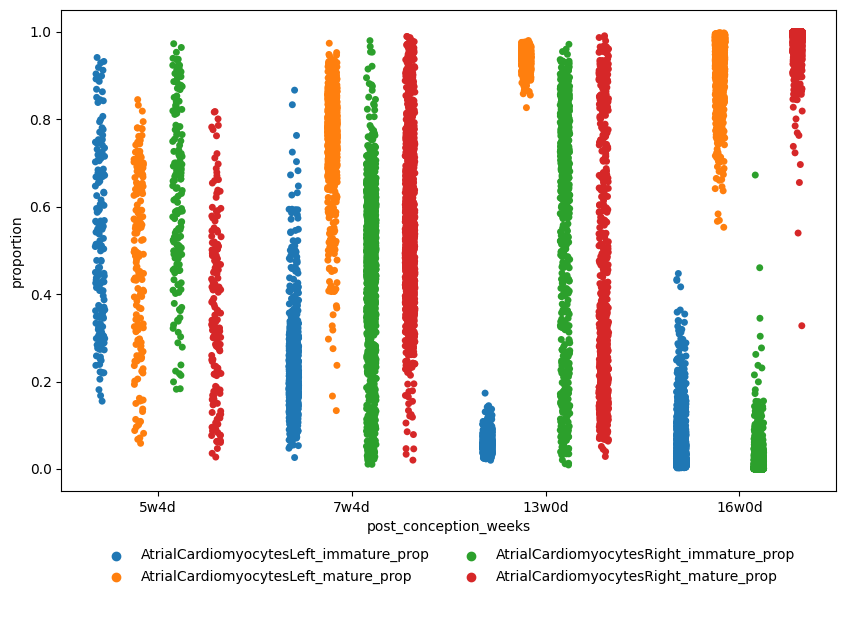

In [106]:
# Define the desired order of 'cell_type' labels
cell_type_order = [
    'AtrialCardiomyocytesLeft_immature_prop', 
    'AtrialCardiomyocytesLeft_mature_prop', 
    'AtrialCardiomyocytesRight_immature_prop', 
    'AtrialCardiomyocytesRight_mature_prop'
]

# Convert the 'cell_type' column to a categorical type with the specified order
df_long['cell_type'] = pd.Categorical(df_long['cell_type'], categories=cell_type_order, ordered=True)

# and the legend will be in the second row.
fig, (ax_main, ax_legend) = plt.subplots(2, 1, figsize=(10, 8), 
                                         gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.05})

# The main strip plot without specifying legend=False
sns.stripplot(data=df_long, x='post_conception_weeks', y='proportion', hue='cell_type', dodge=True, ax=ax_main)

# Hide the legend created by seaborn in the main plot
ax_main.get_legend().remove()

# Extract handles and labels for the legend after creating the plot
handles, labels = ax_main.get_legend_handles_labels()

# Creating the legend in the subplot with 2 columns
ax_legend.legend(handles, labels, loc='center', ncol=2, frameon=False)
ax_legend.axis('off')  # Hide the axes of the legend subplot

plt.show()

/tmp/ipykernel_167508/380920426.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


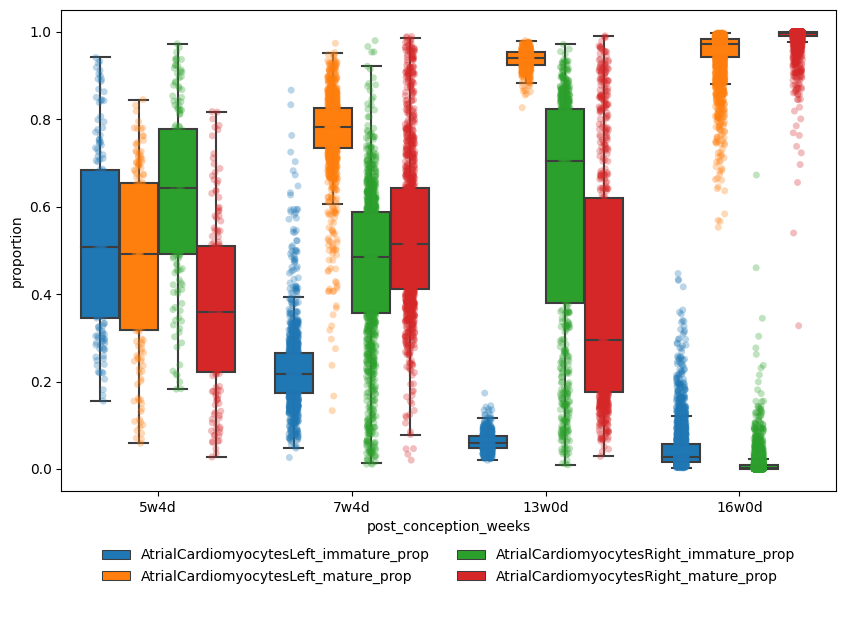

In [107]:
# Creating the figure and axes for the plot and the legend
fig, (ax_main, ax_legend) = plt.subplots(2, 1, figsize=(10, 8), 
                                         gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.05})

# Plotting the box plot first
sns.boxplot(data=df_long, x='post_conception_weeks', y='proportion', hue='cell_type', ax=ax_main, 
            fliersize=0,  # Optionally hide the outliers in the boxplot to avoid overlap with the stripplot points
            dodge=True, saturation = 1)

# Adding the strip plot on top
sns.stripplot(data=df_long, x='post_conception_weeks', y='proportion', hue='cell_type', dodge=True, ax=ax_main,
              alpha=0.3)

# Hide the legend created by seaborn in the main plot to avoid duplication
ax_main.get_legend().remove()

# Extract handles and labels for the legend after creating the plot
handles, labels = ax_main.get_legend_handles_labels()

# Creating the legend in the subplot with 2 columns
ax_legend.legend(handles[:len(cell_type_order)], labels[:len(cell_type_order)], loc='center', ncol=2, frameon=False)
ax_legend.axis('off')  # Hide the axes of the legend subplot
plt.tight_layout()
plt.savefig("./figures/aCMs_immature_proportion_boxplots.pdf",bbox_inches='tight')
plt.show()